<a href="https://colab.research.google.com/github/ricky-kiva/dl-deep-tf-cnn/blob/main/1_l1_sophisticated_img_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build CNN using (more) Sophisticated Images**

Download dataset

In [36]:
!wget --no-check-certificate --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-19 11:13:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   232MB/s    in 0.3s    

2023-09-19 11:13:53 (232 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



Unzip dataset

In [37]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

Check unzipped directory

In [38]:
import os

base_dir = 'cats_and_dogs_filtered'
print("Base directory content: ")
print(os.listdir(base_dir))

Base directory content: 
['train', 'vectorize.py', 'validation']


Referencing directory

In [39]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print('Train directory:')
print(os.listdir(train_dir))

print('\nValidation directory:')
print(os.listdir(validation_dir))

Train directory:
['dogs', 'cats']

Validation directory:
['dogs', 'cats']


Data exploration

In [40]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print(f'Train cat images total: {len(os.listdir(train_cats_dir))}')
print(f'Train dog images total: {len(os.listdir(os.path.join(train_dir, "dogs")))}')

print(f'\nValidation cat images total: {len(os.listdir(os.path.join(validation_dir, "cats")))}')
print(f'Validation dog images total: {len(os.listdir(os.path.join(validation_dir, "dogs")))}')

Train cat images total: 1000
Train dog images total: 1000

Validation cat images total: 500
Validation dog images total: 500


In [41]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)

print('Train cat images:')
print(train_cat_fnames[:10])

print('Train dog images:')
print(train_dog_fnames[:10])

Train cat images:
['cat.28.jpg', 'cat.169.jpg', 'cat.90.jpg', 'cat.365.jpg', 'cat.726.jpg', 'cat.379.jpg', 'cat.957.jpg', 'cat.333.jpg', 'cat.20.jpg', 'cat.679.jpg']
Train dog images:
['dog.41.jpg', 'dog.451.jpg', 'dog.391.jpg', 'dog.403.jpg', 'dog.627.jpg', 'dog.965.jpg', 'dog.602.jpg', 'dog.824.jpg', 'dog.139.jpg', 'dog.581.jpg']


Data visualization

In [42]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

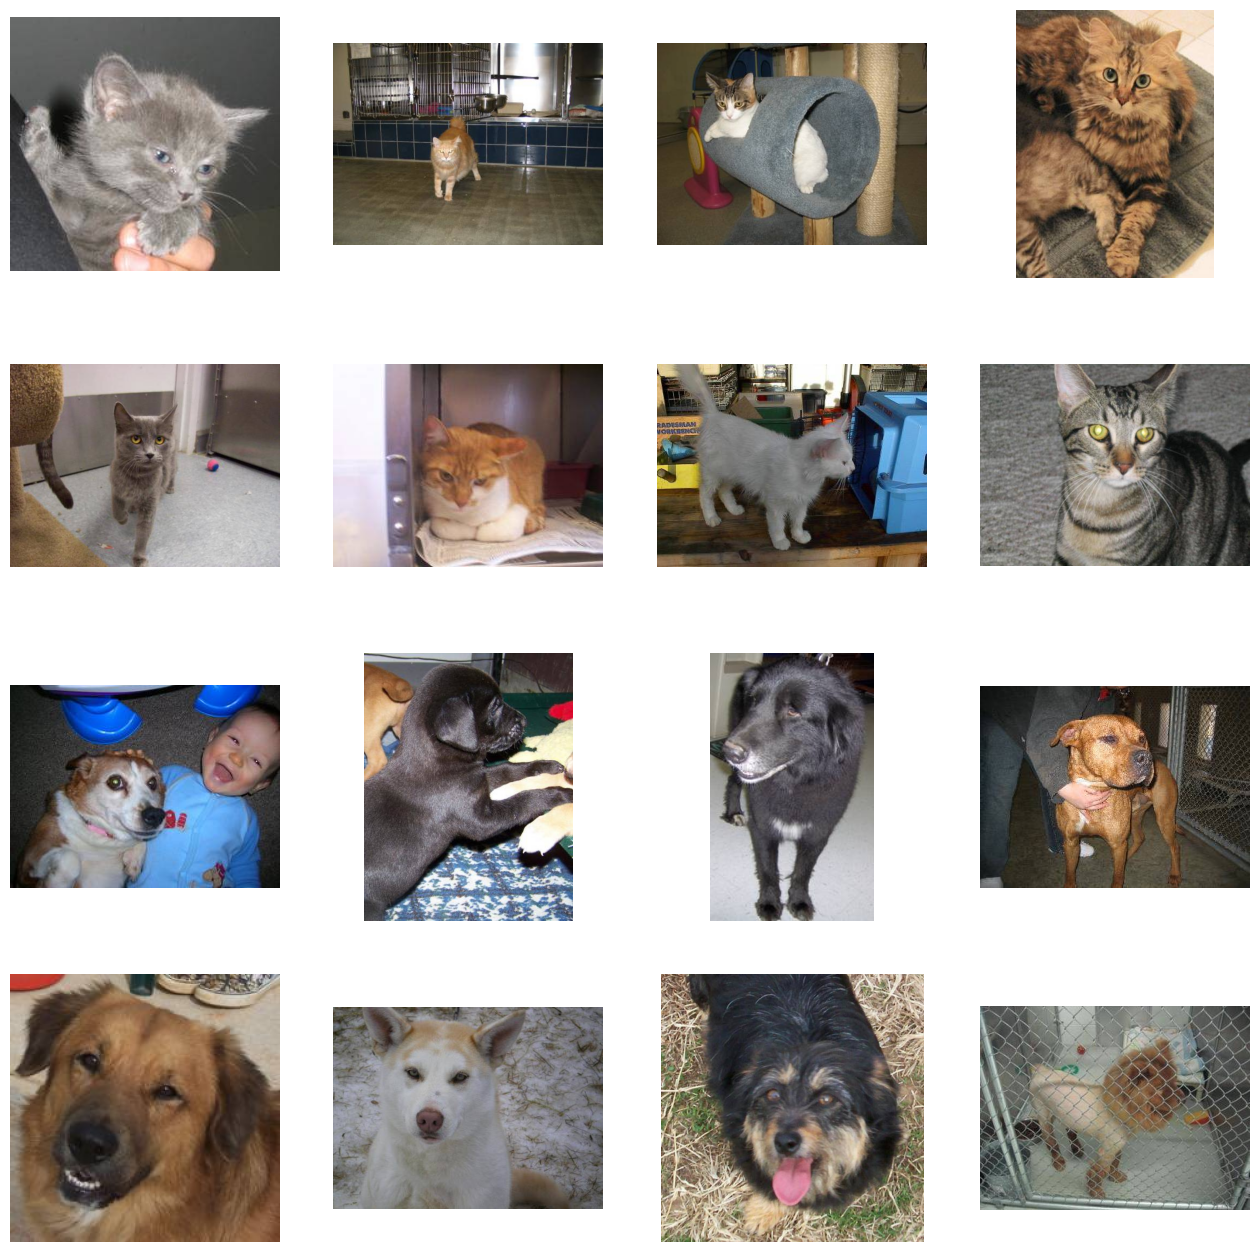

In [43]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname
                in train_cat_fnames[pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname
                in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Build the model

In [44]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(26, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D((2,2)),

    # fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 26)        7514      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 26)       

Compile the model

In [45]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Data preprocessing

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Train the model

In [47]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/15
100/100 - 6s - loss: 0.7076 - accuracy: 0.5625 - val_loss: 0.7147 - val_accuracy: 0.5050 - 6s/epoch - 64ms/step
Epoch 2/15
100/100 - 6s - loss: 0.6351 - accuracy: 0.6505 - val_loss: 0.6078 - val_accuracy: 0.7020 - 6s/epoch - 56ms/step
Epoch 3/15
100/100 - 5s - loss: 0.5729 - accuracy: 0.7080 - val_loss: 0.5626 - val_accuracy: 0.7190 - 5s/epoch - 46ms/step
Epoch 4/15
100/100 - 5s - loss: 0.5005 - accuracy: 0.7585 - val_loss: 0.5276 - val_accuracy: 0.7310 - 5s/epoch - 54ms/step
Epoch 5/15
100/100 - 6s - loss: 0.4363 - accuracy: 0.7945 - val_loss: 0.5785 - val_accuracy: 0.7030 - 6s/epoch - 57ms/step
Epoch 6/15
100/100 - 5s - loss: 0.3976 - accuracy: 0.8220 - val_loss: 0.6440 - val_accuracy: 0.7070 - 5s/epoch - 51ms/step
Epoch 7/15
100/100 - 5s - loss: 0.3447 - accuracy: 0.8415 - val_loss: 0.7203 - val_accuracy: 0.6750 - 5s/epoch - 46ms/step
Epoch 8/15
100/100 - 6s - loss: 0.2880 - accuracy: 0.8805 - val_loss: 0.6494 - val_accuracy: 0.7150 - 6s/epoch - 55ms/step
Epoch 9/15
100/1

Predict using the model

In [48]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat 1.jpg to cat 1 (2).jpg
1/1 [==============================] - 0s 74ms/step
[0.]
cat 1 (2).jpg is a cat


# Visualizing intermediate Representations

Visualize what kind of features CNN has leared

1/1 [==============================] - 0s 122ms/step


<ipython-input-55-ae8c37fb5e4e>:34: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


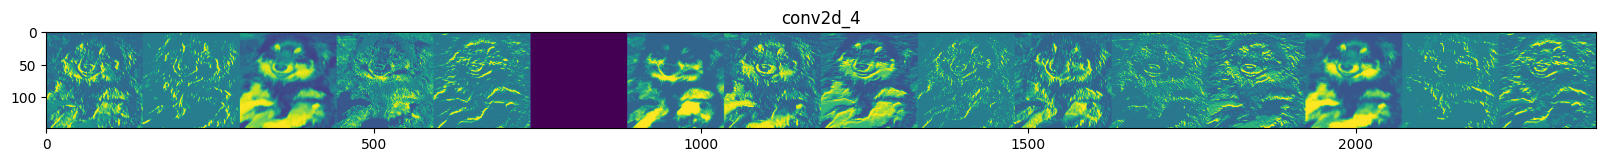

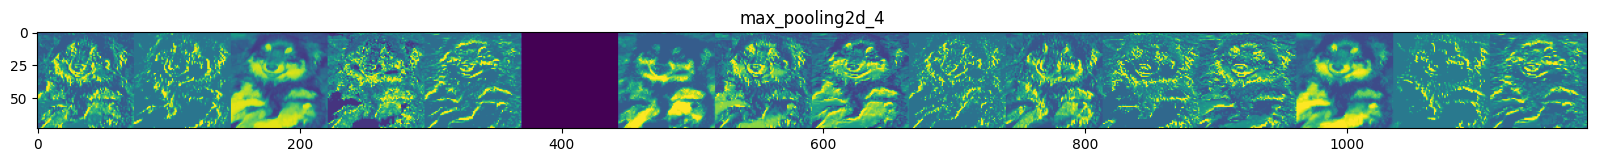

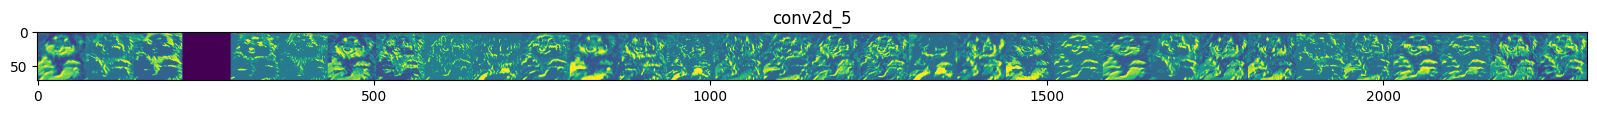

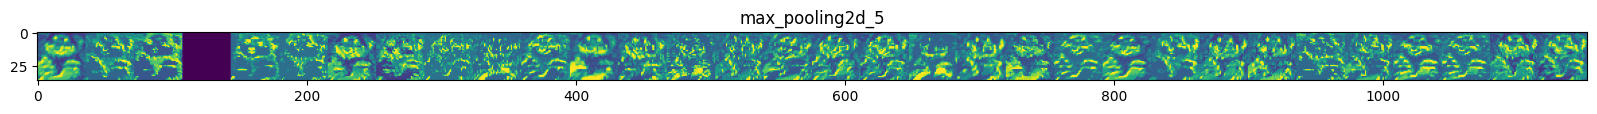

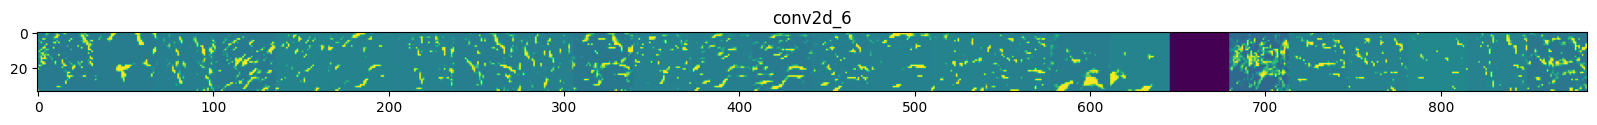

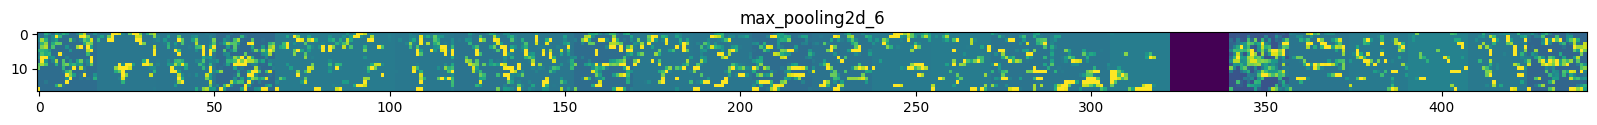

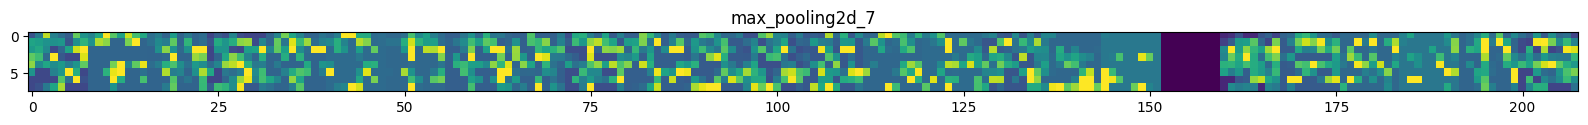

In [55]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150,150))

x = img_to_array(img) # convert PIL
x = x.reshape((1,) + x.shape) # add dimensionality
x /= 255 # scale (normalize)

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # tile each filter into a horizontal grid
      # `:,` select all rows
      # `i * size` give the starting column index
      # `(i + 1) * size` give the ending column index

    scale = 20. / n_features
    plt.figure(figsize=((scale*n_features), scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')